In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv('IAS.csv')

In [7]:
df.describe()

,RowID,Crop_Year,Area,Production
count,73827.000000,73827.000000,7.382700e+04,7.273100e+04
mean,36913.000000,2013.657551,1.218297e+04,6.210320e+05
std,21312.163499,4.954910,5.348285e+04,1.749756e+07
min,0.000000,2005.000000,4.000000e-02,0.000000e+00
25%,18456.500000,2010.000000,8.100000e+01,8.900000e+01
50%,36913.000000,2014.000000,5.900000e+02,7.290000e+02
75%,55369.500000,2018.000000,4.500000e+03,7.200000e+03
max,73826.000000,2023.000000,8.580100e+06,1.125000e+09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73827 entries, 0 to 73826
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RowID          73827 non-null  int64  
 1   State_Name     73827 non-null  object 
 2   District_Name  73827 non-null  object 
 3   Crop_Year      73827 non-null  int64  
 4   Season         73827 non-null  object 
 5   Crop           73827 non-null  object 
 6   Area           73827 non-null  float64
 7   Production     72731 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [9]:
df.isnull().sum()

RowID               0
State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       1096
dtype: int64

In [20]:
df['Production'].fillna(df['Production'].mean(), inplace=True)

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_10148\3542392576.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Production'].fillna(df['Production'].mean(), inplace=True)


In [21]:
df.isnull().sum()

RowID            0
State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [22]:
df.shape

(73827, 8)

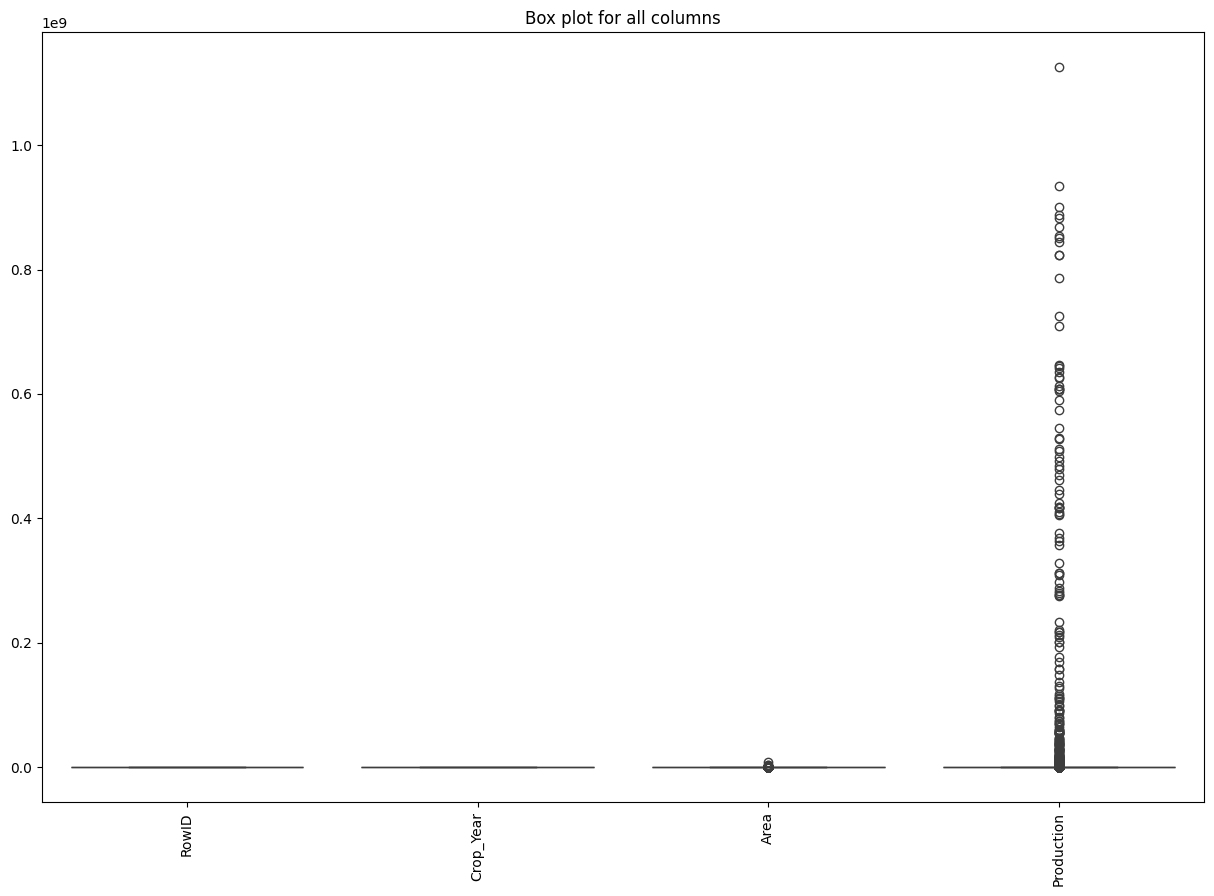

In [25]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box plot for all columns')
plt.show()

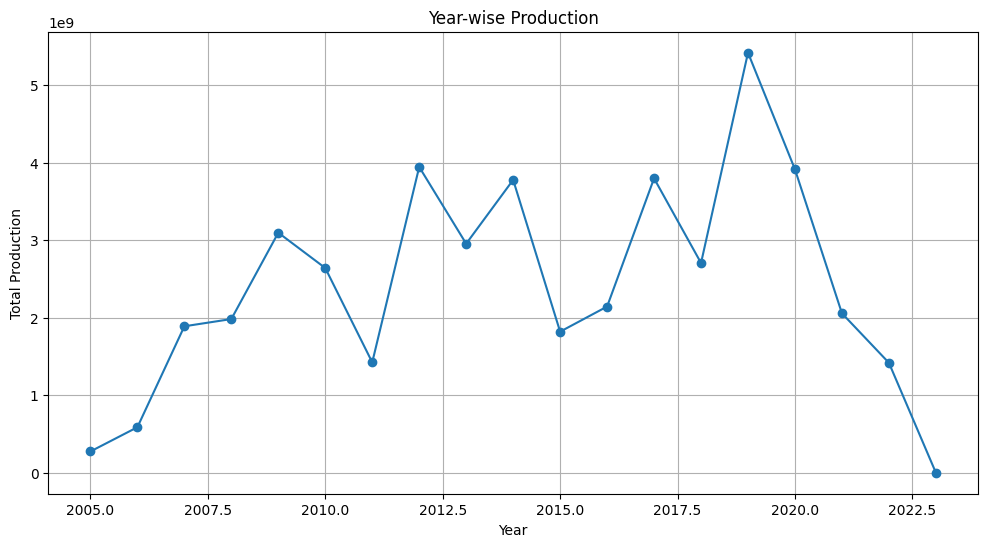

In [ ]:
yearly_production = df.groupby('Crop_Year')['Production'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_production['Crop_Year'], yearly_production['Production'], marker='o')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.title('Year-wise Production')
plt.grid(True)
plt.show()

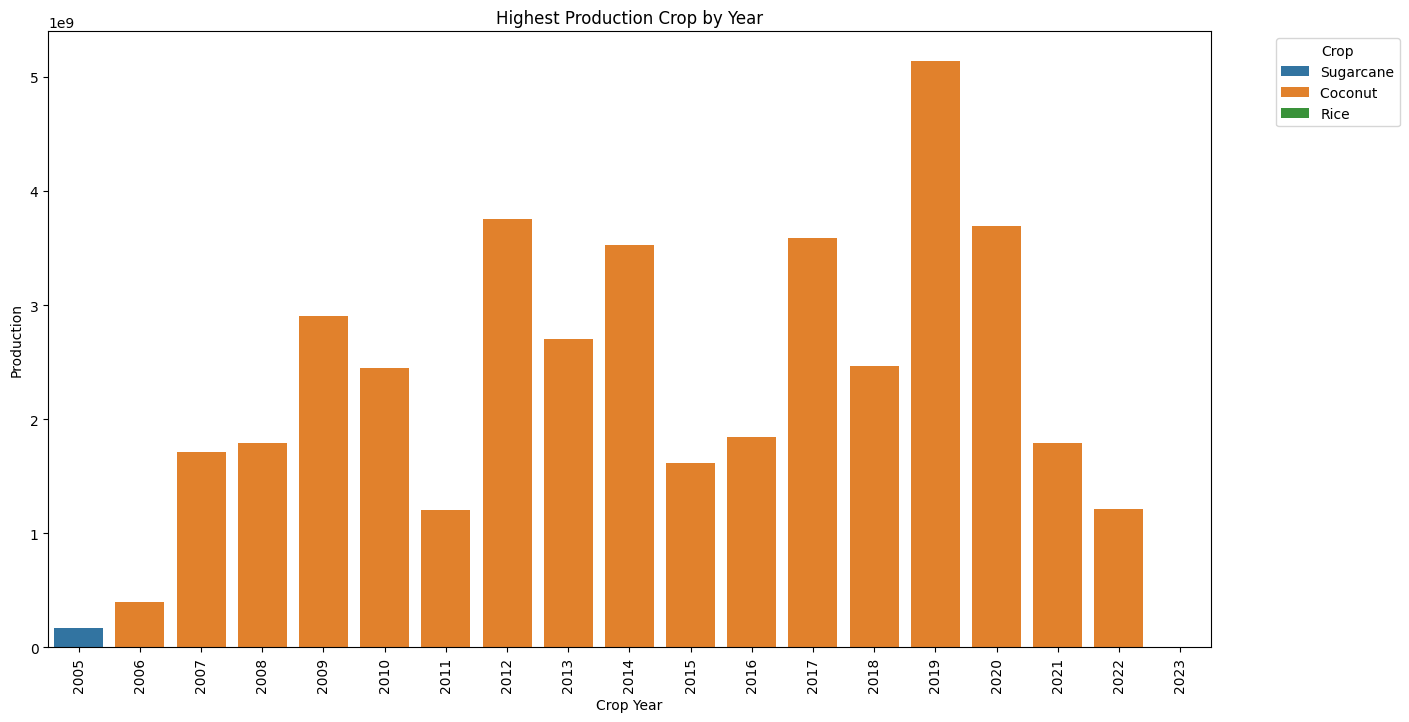

In [28]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Crop_Year', y='Production', hue='Crop', data=max_crop_yearly_production)
plt.xticks(rotation=90)
plt.xlabel('Crop Year')
plt.ylabel('Production')
plt.title('Highest Production Crop by Year')
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

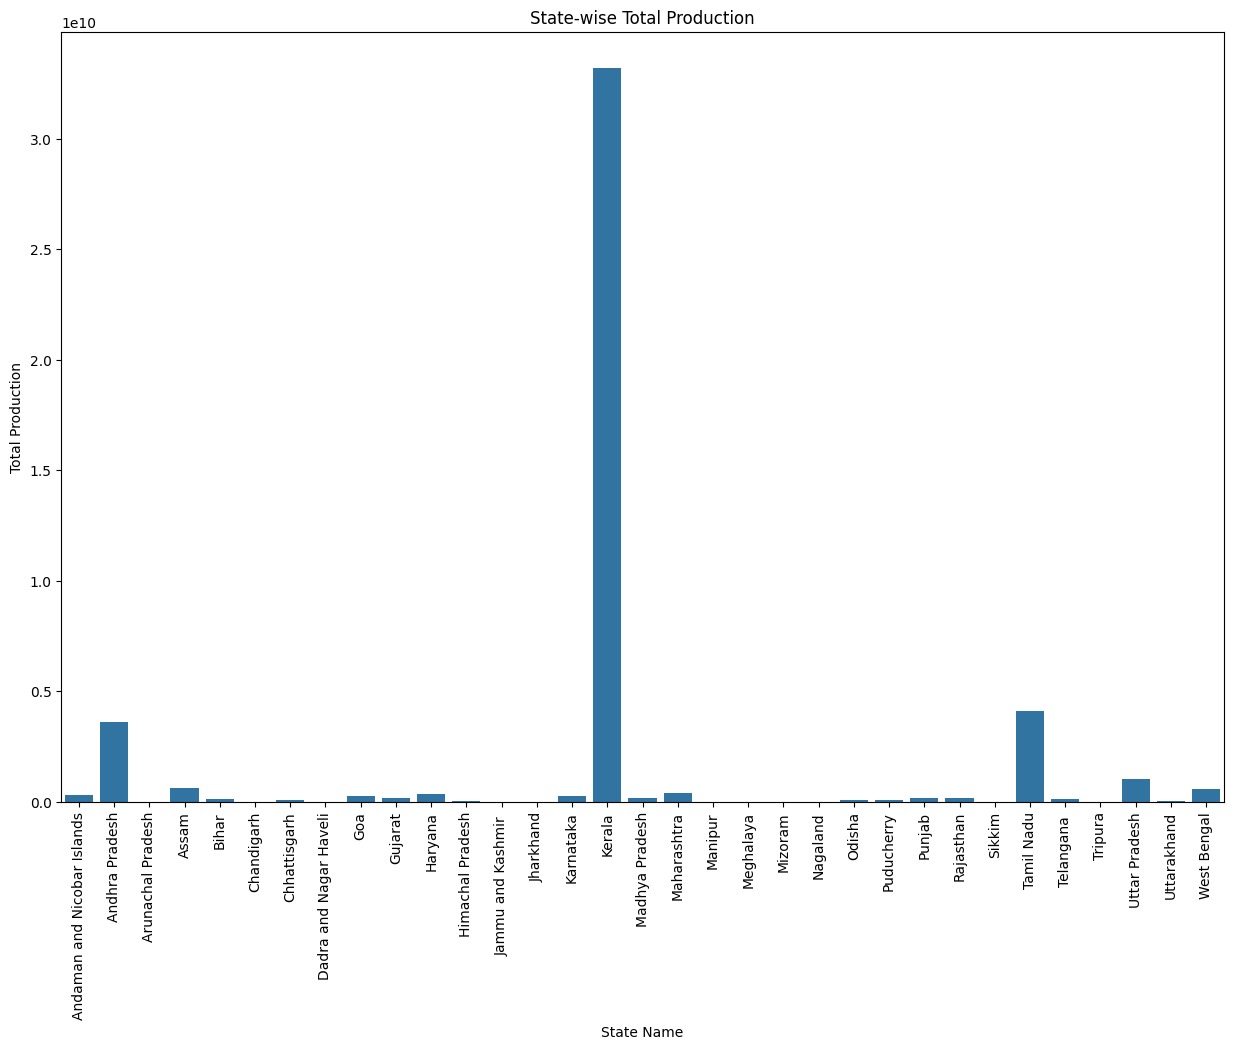

In [29]:
# Group by State_Name and sum the Production
state_wise_production = df.groupby('State_Name')['Production'].sum().reset_index()

# Plot the state-wise production
plt.figure(figsize=(15, 10))
sns.barplot(x='State_Name', y='Production', data=state_wise_production)
plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel('Total Production')
plt.title('State-wise Total Production')
plt.show()

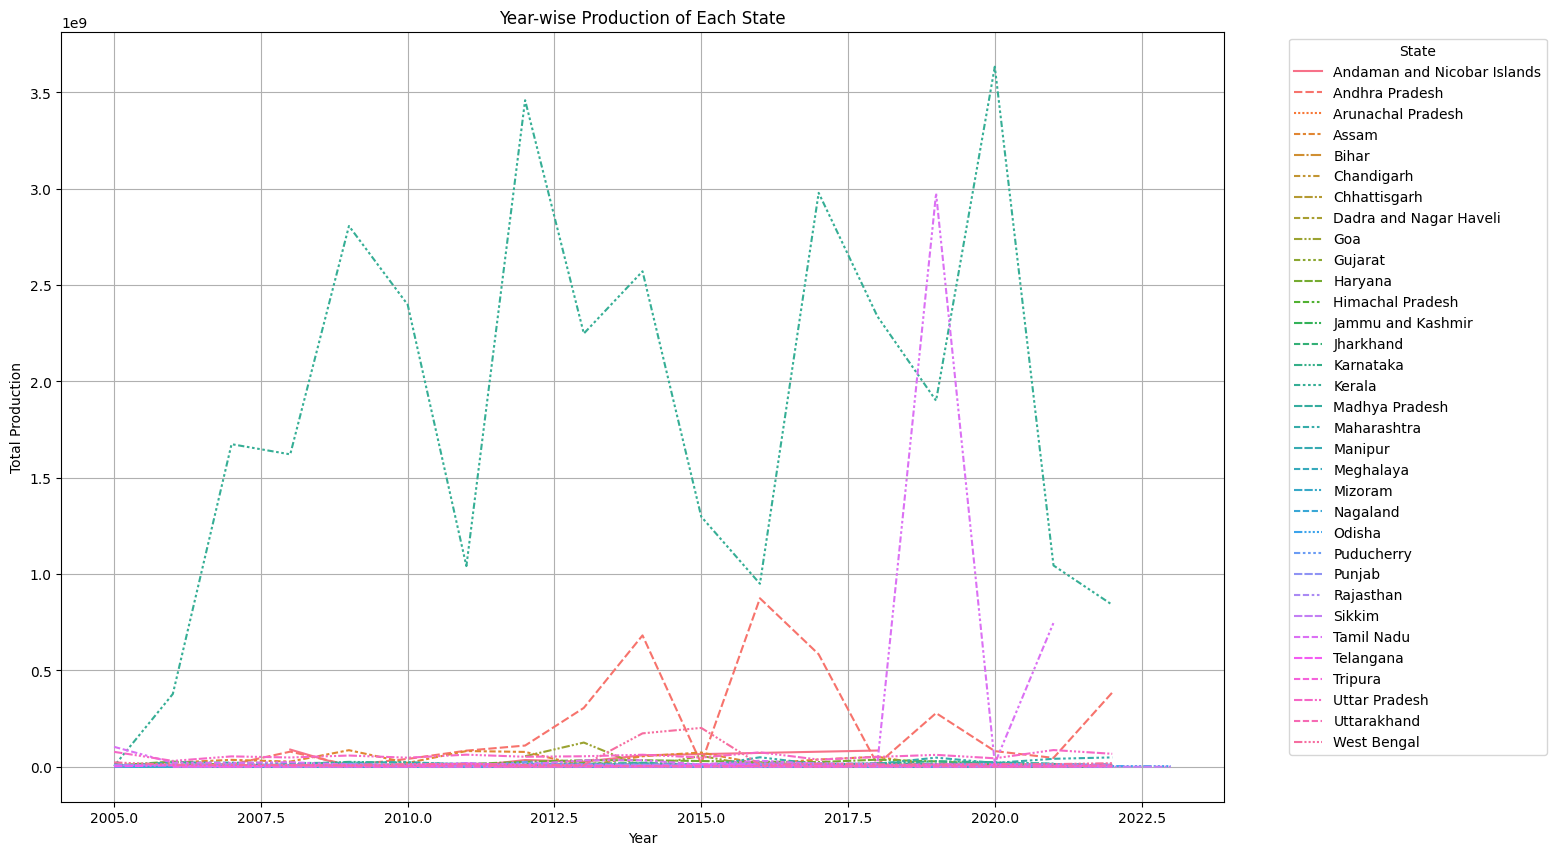

In [31]:
# Pivot the dataframe to get year-wise production for each state
state_yearly_production = df.pivot_table(values='Production', index='Crop_Year', columns='State_Name', aggfunc='sum')

# Plot the data
plt.figure(figsize=(15, 10))
sns.lineplot(data=state_yearly_production)
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.title('Year-wise Production of Each State')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [32]:
lowest_production_state = state_wise_production.loc[state_wise_production['Production'].idxmin()]
print(lowest_production_state)

State_Name    Chandigarh
Production       29230.0
Name: 5, dtype: object


In [36]:
# Filter the dataframe for Winter and Summer seasons
winter_summer_df = df[df['Season'].isin(['Winter', 'Summer'])]

# Check if the filtered dataframe is empty
if not winter_summer_df.empty:
	# Group by Crop_Year and Season, and sum the Production
	seasonal_production = winter_summer_df.groupby(['Crop_Year', 'Season'])['Production'].sum().unstack()

	# Plot the data
	plt.figure(figsize=(12, 6))
	seasonal_production.plot(kind='bar', stacked=True, figsize=(15, 10))
	plt.xlabel('Crop Year')
	plt.ylabel('Total Production')
	plt.title('Winter and Summer Production by Year')
	plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
	plt.xticks(rotation=90)
	plt.grid(True)
	plt.show()
else:
	print("No data available for Winter and Summer seasons.")

No data available for Winter and Summer seasons.


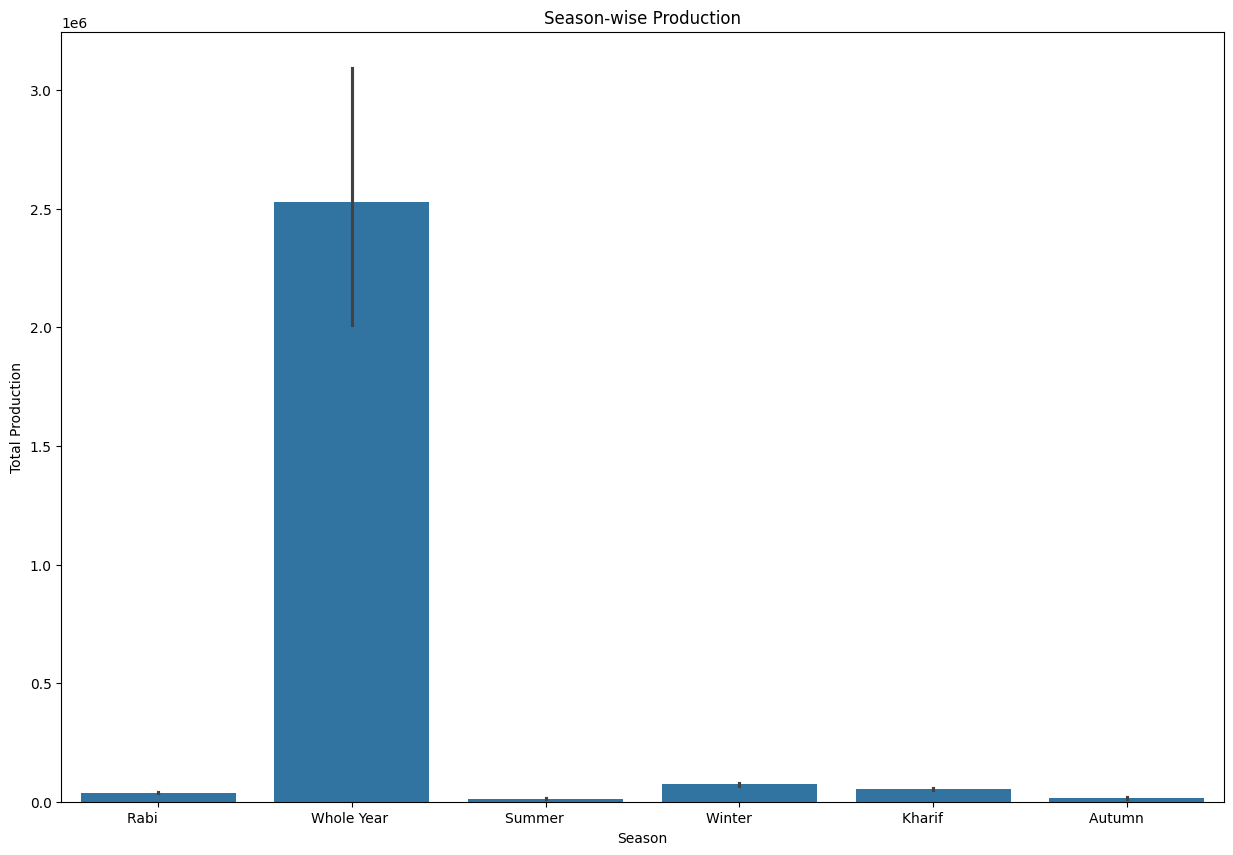

In [40]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Season', y='Production', data=df)
plt.xlabel('Season')
plt.ylabel('Total Production')
plt.title('Season-wise Production')
plt.show()

In [47]:
# Group by Season and Crop, and sum the Production
season_crop_production = df.groupby(['Season', 'Crop'])['Production'].sum().reset_index()

# Find the crop with the highest production for each season
best_crops = season_crop_production.loc[season_crop_production.groupby('Season')['Production'].idxmax()]

print(best_crops)

          Season       Crop    Production
13   Autumn            Rice  1.731260e+07
89   Kharif       Sugarcane  5.140886e+08
166  Rabi             Wheat  3.869581e+08
190  Summer            Rice  3.811603e+07
226  Whole Year    Coconut   4.180346e+10
316  Winter            Rice  1.176271e+08


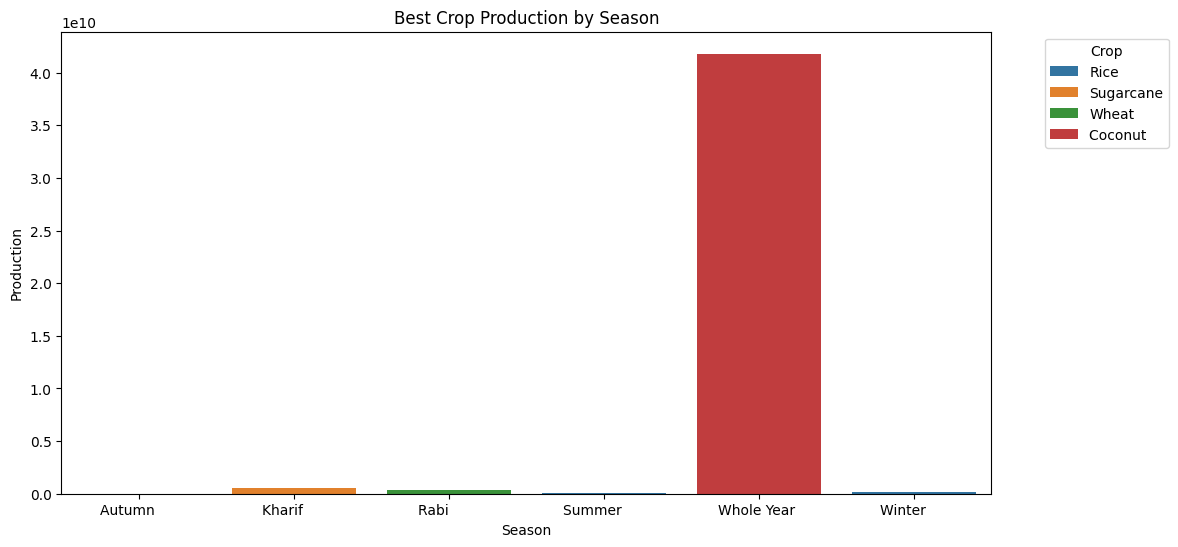

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Production', hue='Crop', data=best_crops)
plt.xlabel('Season')
plt.ylabel('Production')
plt.title('Best Crop Production by Season')
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

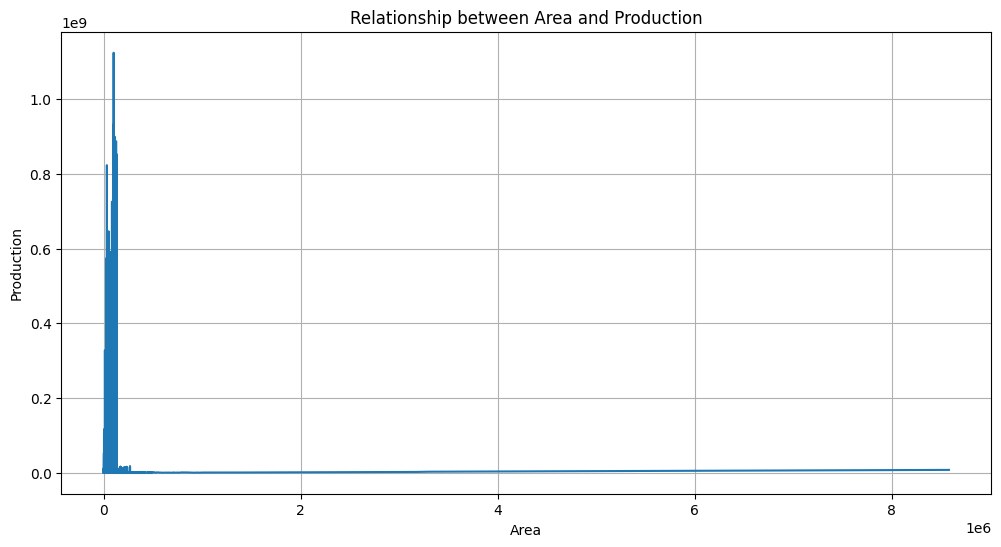

In [50]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Area', y='Production', data=df)
plt.xlabel('Area')
plt.ylabel('Production')
plt.title('Relationship between Area and Production')
plt.grid(True)
plt.show()

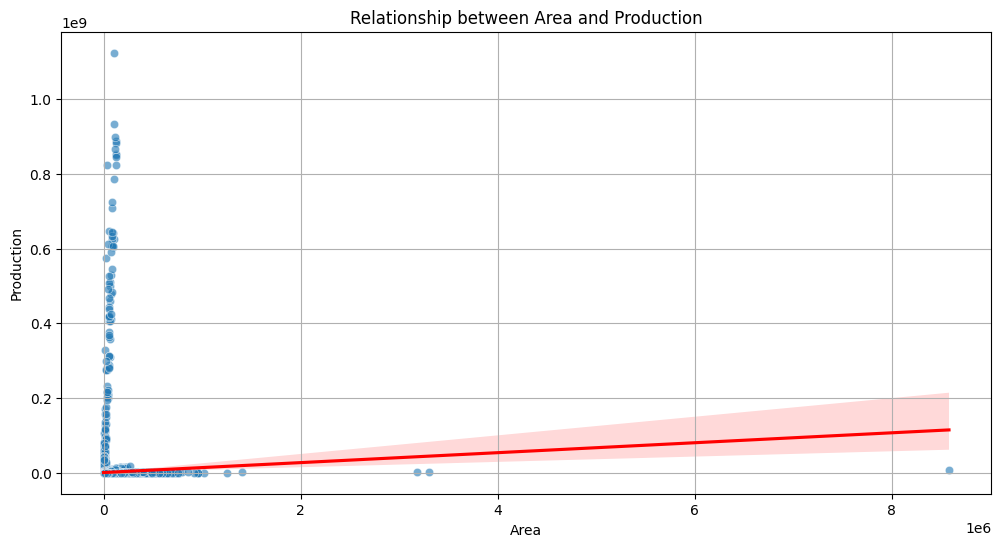

In [52]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Area', y='Production', data=df, alpha=0.6)
sns.regplot(x='Area', y='Production', data=df, scatter=False, color='red')
plt.xlabel('Area')
plt.ylabel('Production')
plt.title('Relationship between Area and Production')
plt.grid(True)
plt.show()

Based on the graphs and data provided in the Jupyter Notebook, here are some insights:

1. **Box Plot for All Columns**:
    - The box plot shows the distribution of values for each column in the dataframe. It helps identify outliers and the spread of the data. For example, the `Production` column has a wide range of values with some significant outliers.

2. **Year-wise Production**:
    - The line plot of yearly production shows the trend of total production over the years. There are noticeable peaks in certain years, indicating higher production during those periods. For instance, the year 2019 shows a significant peak in production.

3. **Highest Production Crop by Year**:
    - The bar plot shows the crop with the highest production for each year. Coconut appears to be the crop with the highest production in multiple years, indicating its dominance in terms of production volume.

4. **State-wise Total Production**:
    - The bar plot of state-wise total production highlights the states with the highest and lowest production. Kerala stands out with the highest total production, while Chandigarh has the lowest.

5. **Year-wise Production of Each State**:
    - The line plot shows the production trends for each state over the years. It provides a detailed view of how production has varied for different states. Kerala consistently shows high production values.

6. **Lowest Production State**:
    - The state with the lowest production is Chandigarh, with a total production of 29,230 units.

7. **Winter and Summer Production by Year**:
    - The stacked bar plot shows the total production for Winter and Summer seasons by year. It helps compare the production between these two seasons over the years. The plot indicates that Winter generally has higher production compared to Summer.

8. **Season-wise Production**:
    - The bar plot shows the total production for each season. Whole Year and Kharif seasons have the highest production, while Summer has the lowest.

9. **Best Crop Production by Season**:
    - The bar plot shows the crop with the highest production for each season. For example, Rice is the best crop for Autumn, Summer, and Winter seasons, while Sugarcane is the best crop for Kharif season.

10. **Relationship between Area and Production**:
     - The line plot and scatter plot with regression line show the relationship between the area and production. There is a positive correlation, indicating that as the area increases, the production also tends to increase.

These insights provide a comprehensive overview of the agricultural production data, highlighting key trends and patterns across different dimensions such as time, state, season, and crop type.